In [1]:
print(""" 
Course name: COM6013 Data Mining
Tutor name: Karthick Kathirvel
Institute: Arden University

Student ID: STU111322

Data Mining Mini Project in Python Part 1, equivalent to 2800 words

Name of sales report the analysis is to be conducted on: Correct_Assignment data set_Feb_24_SCC.xlsx

Name of the report: stu111322.ipynb

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Case Scenario:

You have recently joined Confectionaries Are Us as a junior analyst. As your first data mining investigation, your line manager has asked you to build and complete appropriate models so that the site based company 
can use your optimum, relative investigation for targeted increase profitability over time, both for individual countries and collectively, based upon differing variables.

Before the analysis can be conducted, ensure that all pre-processing has been undertaken on the data set and the data set is fully understood through initial descriptive statistics. 
For the main body of the analysis, you are to choose the most appropriate time modelling techniques and processes for the investigation, based upon the data. 
In doing so, this will allow insight into the overall analysis and appropriate meaningful solutions. The full investigation is to be written in Python.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
""")

 
Course name: COM6013 Data Mining
Tutor name: Karthick Kathirvel
Institute: Arden University

Student ID: STU111322

Data Mining Mini Project in Python Part 1, equivalent to 2800 words

Name of sales report the analysis is to be conducted on: Correct_Assignment data set_Feb_24_SCC.xlsx

Name of the report: stu111322.ipynb

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Case Scenario:

You have recently joined Confectionaries Are Us as a junior analyst. As your first data mining investigation, your line manager has asked you to build and complete appropriate models so that the site based company 
can use your optimum, relative investigation for targeted increase profitability over time, both for individual countries and collectively, based upon differing variables.

Before the analysis can be conducted, ensure that all pre

In [2]:
# Begin of python code
# Import of necessary modules to complete the assigmend accordignly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from efficient_apriori import apriori
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


print('Profitability Over Time Report for period 2000 - 2005')
print('Analysis conducted on file Correct_Assignment data set_Feb_24_SCC.xlsx\n')

# Load the dataset and declaration of variable data_set which will contain the pandas function to read the xlsx file
data_set = pd.read_excel("Correct_Assignment data set_Feb_24_SCC.xlsx")


# Display the first 5 rows of the sales report
print('Display first & last 5 rows of the dataset to identify size of sales report.\n')
print(data_set.head())
print()

# Display the last 5 rows of the dataset to identify size of sales report
print('\nLast 5 entries of report as follows\n')
print(data_set.tail())
print()

# Declaration of variable that contains numerical-related data from sales report for initial statistical analysis
data_set_summary = data_set[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']]
print('Presentation of initial statistical analysis\n')
print(data_set_summary.describe())
print()
print('Presentation of type-of-data statistical analysis\n')
print(data_set.info())


Profitability Over Time Report for period 2000 - 2005
Analysis conducted on file Correct_Assignment data set_Feb_24_SCC.xlsx

Display first & last 5 rows of the dataset to identify size of sales report.

        Date Country(UK) Confectionary  Units Sold  Revenue(£)  Cost(£)   
0 2002-11-11     England       Biscuit      1118.0      5590.0   2459.6  \
1 2002-07-05     England       Biscuit       708.0      3540.0   1557.6   
2 2001-10-31     England       Biscuit      1269.0      6345.0   2791.8   
3 2004-09-13     England       Biscuit      1631.0      8155.0   3588.2   
4 2004-03-10     England       Biscuit      2240.0     11200.0   4928.0   

   Profit(£)  
0     3130.4  
1     1982.4  
2     3553.2  
3     4566.8  
4     6272.0  


Last 5 entries of report as follows

           Date Country(UK) Confectionary  Units Sold  Revenue(£)  Cost(£)   
996  2005-08-31      Jersey   Caramel Nut      1596.0      9576.0   4389.0  \
997  2001-09-12      Jersey   Caramel Nut       986.0      5

In [3]:
# Declaration of variables holding text-type-of-data to check for any typing mistakes in the report and correct them 
confectionary = data_set['Confectionary'].unique()
countries = data_set['Country(UK)'].unique()

# Print the confectionary and countries
print('Presentation of text-type-of-data to check and consequtively correct any spelling mistakes.\n')
print('Confectionary types in the report before manupulation are:',confectionary,'\n')
print('The type of Country (UK) in the report before manupulation are:', countries,'\n')
print('Baed on the above, the sales report outlines mistakes in the Confectionary listing.\n')

# Declaration of a dictionary that contains with keys and values to correct case sensitivity and mistyped words
corrected_confectionary = {
    
    'Biscuit Nut': 'Biscuit Nut',
    'Caramel nut': 'Caramel Nut',  # Correcting case sensitivity
    'Caramel': 'Caramel',
    'Plain': 'Plain',
    'Choclate Chunk': 'Chocolate Chunk',  # Correcting spelling mistake
    'Chocolate Chunk': 'Chocolate Chunk',
    'Biscuit': 'Biscuit'
}

# Updating the sales report with the correct wording for confectionary types using the map() function together with the fillna()
data_set['Confectionary'] = data_set['Confectionary'].map(corrected_confectionary).fillna(data_set['Confectionary'])
confectionary_update = data_set['Confectionary'].unique()
print('Confectionary types in the report after manipulation:',confectionary_update)


Presentation of text-type-of-data to check and consequtively correct any spelling mistakes.

Confectionary types in the report before manupulation are: ['Biscuit' 'Biscuit Nut' 'Choclate Chunk' 'Caramel nut' 'Caramel' 'Plain'
 'Chocolate Chunk' 'Caramel Nut'] 

The type of Country (UK) in the report before manupulation are: ['England' 'Scotland' 'Wales' 'N. Ireland' 'Jersey'] 

Baed on the above, the sales report outlines mistakes in the Confectionary listing.

Confectionary types in the report after manipulation: ['Biscuit' 'Biscuit Nut' 'Chocolate Chunk' 'Caramel Nut' 'Caramel' 'Plain']


In [4]:
# Further analysis to correctly identify missing data and propose decisions for anomaly handling
print('Now that the report contains correct vairable names, let us check if there are any numerical missing values.')
print('The missing values in the sales report per variable are:\n')
print(data_set_summary.isnull().sum())
print()

# Declaration of a variable that contains the total number of missing values across the sales report 
missing_values = data_set.isnull().sum().sum()
print('The total number of missing values in sales report are:', missing_values)

# Declaration of a variable that holds data for total number of values in the sales report
total_values = data_set.size
print('The total number of values in report are:', total_values)
print()

# Declaration of a variable that calculates the percentage of missing values coming from the sales report 
anomalies = (missing_values / total_values) * 100

# Initial conclusions taken in order to proceed with the forecast report 
print(f'The missing values represent {anomalies:.2f}% of the sales report and thus, being just under 0.4%, are considered not significant at all.')
print('Based on conclusions above, the missing values will be updated with the mean value per data set variable, calculated per Country and per Type of Confecitonary.')

Now that the report contains correct vairable names, let us check if there are any numerical missing values.
The missing values in the sales report per variable are:

Units Sold    5
Revenue(£)    9
Cost(£)       9
Profit(£)     3
dtype: int64

The total number of missing values in sales report are: 26
The total number of values in report are: 7007

The missing values represent 0.37% of the sales report and thus, being just under 0.4%, are considered not significant at all.
Based on conclusions above, the missing values will be updated with the mean value per data set variable, calculated per Country and per Type of Confecitonary.


In [5]:
# Declaration of a variables that will carry data of the mean values per variable type in sales report
# Recalculate the mean values with trasnform() to allow to execute a function for each value of the Data Set Sales Report
units_mean = data_set.groupby(['Country(UK)', 'Confectionary'])['Units Sold'].transform('mean')
revenue_mean = data_set.groupby(['Country(UK)', 'Confectionary'])['Revenue(£)'].transform('mean')
cost_mean = data_set.groupby(['Country(UK)', 'Confectionary'])['Cost(£)'].transform('mean')
profit_mean = data_set.groupby(['Country(UK)', 'Confectionary'])['Profit(£)'].transform('mean')

# Fill the missing values directly using fillna()
data_set['Units Sold'] = data_set['Units Sold'].fillna(units_mean)
data_set['Revenue(£)'] = data_set['Revenue(£)'].fillna(revenue_mean)
data_set['Cost(£)'] = data_set['Cost(£)'].fillna(cost_mean)
data_set['Profit(£)'] = data_set['Profit(£)'].fillna(profit_mean)

# Checking the data set sales report again for any missing values
print('Checking the data set sales report again for any missing values')
print(data_set.isnull().sum())
print()

print('Ensuring the code has not deleted any entries from the sales report.\n')
print(data_set.head())
print('--------------------')
print('--------------------')
print(data_set.tail())

Checking the data set sales report again for any missing values
Date             0
Country(UK)      0
Confectionary    0
Units Sold       0
Revenue(£)       0
Cost(£)          0
Profit(£)        0
dtype: int64

Ensuring the code has not deleted any entries from the sales report.

        Date Country(UK) Confectionary  Units Sold  Revenue(£)  Cost(£)   
0 2002-11-11     England       Biscuit      1118.0      5590.0   2459.6  \
1 2002-07-05     England       Biscuit       708.0      3540.0   1557.6   
2 2001-10-31     England       Biscuit      1269.0      6345.0   2791.8   
3 2004-09-13     England       Biscuit      1631.0      8155.0   3588.2   
4 2004-03-10     England       Biscuit      2240.0     11200.0   4928.0   

   Profit(£)  
0     3130.4  
1     1982.4  
2     3553.2  
3     4566.8  
4     6272.0  
--------------------
--------------------
           Date Country(UK) Confectionary  Units Sold  Revenue(£)  Cost(£)   
996  2005-08-31      Jersey   Caramel Nut      1596.0     

In [6]:
print('Now that all data on the sales report has been cleaned accordingly, let`s proceed with further Statistical analysis.\n')

# Shortening the variable name carrying the dataset for improved and robust code. 
df = data_set.copy()

dfvalues = df[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']]
# The Statistican values printed below include complete data and will be used in the document report 
print(dfvalues.describe())

Now that all data on the sales report has been cleaned accordingly, let`s proceed with further Statistical analysis.

        Units Sold   Revenue(£)       Cost(£)     Profit(£)
count  1001.000000   1001.00000   1001.000000   1001.000000
mean   1633.547277   6846.90113   2817.795259   4015.556110
std     874.260576   4683.08665   2068.057002   2645.167947
min     200.000000    200.00000     40.000000    160.000000
25%     941.000000   3000.00000   1214.400000   1873.600000
50%    1531.000000   5985.00000   2454.000000   3460.800000
75%    2296.000000   9495.00000   3968.000000   5451.000000
max    4493.000000  23988.00000  10994.500000  13479.000000


Numerical Statistics

Presentation on Distribution by count, with Kernel Density Estimate - KDE curve


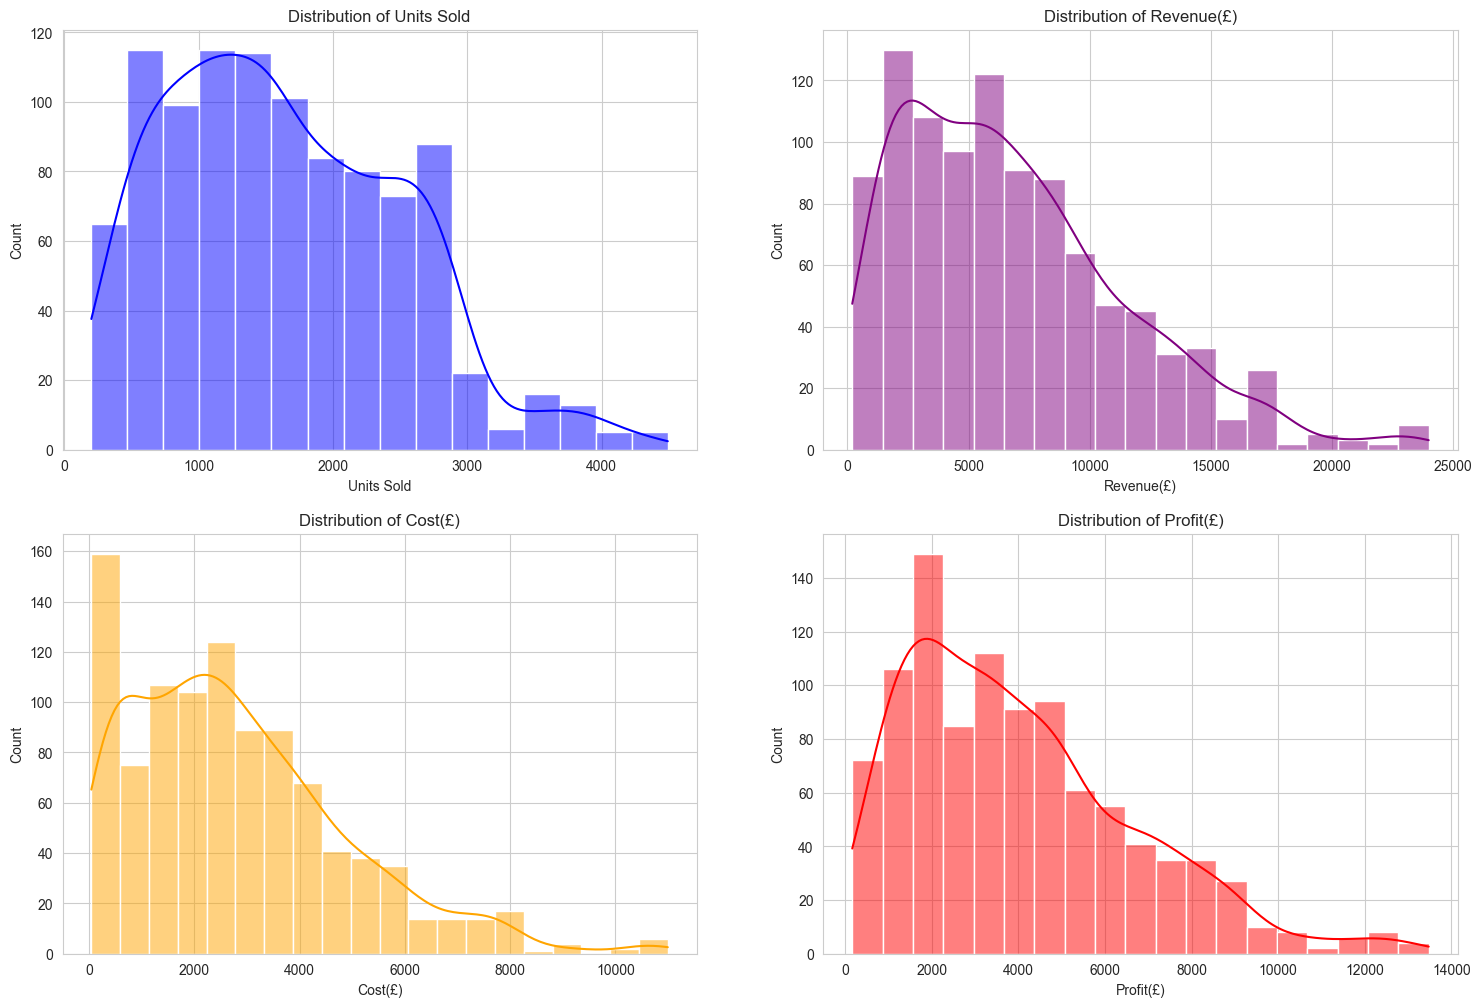

In [7]:
print('Numerical Statistics\n')
print('Presentation on Distribution by count, with Kernel Density Estimate - KDE curve')

# Let's start by visualising the above numbers in more readable format
# choice of background color and grid for the vizual plots with most common whitegrid
sns.set_style("whitegrid")

# outline for figures for subplots
plt.figure(figsize=(18,12))

# use of bining data transformation

# Distribution of Units Sold
plt.subplot(2,2,1)
sns.histplot(df['Units Sold'], kde=True, color= 'blue')
plt.title('Distribution of Units Sold')

# Distribution of Revenue(£)
plt.subplot(2,2,2)
sns.histplot(df['Revenue(£)'], kde=True, color='purple')
plt.title('Distribution of Revenue(£)')

# Distribution of Cost(£)
plt.subplot(2,2,3)
sns.histplot(df['Cost(£)'], kde=True, color='orange')
plt.title('Distribution of Cost(£)')

# Distribution of Profit(£)
plt.subplot(2,2,4)
sns.histplot(df['Profit(£)'], kde=True, color='red')
plt.title('Distribution of Profit(£)')

plt.show()

Presentation on Standard Deviation by year, instance for identification of Outliers


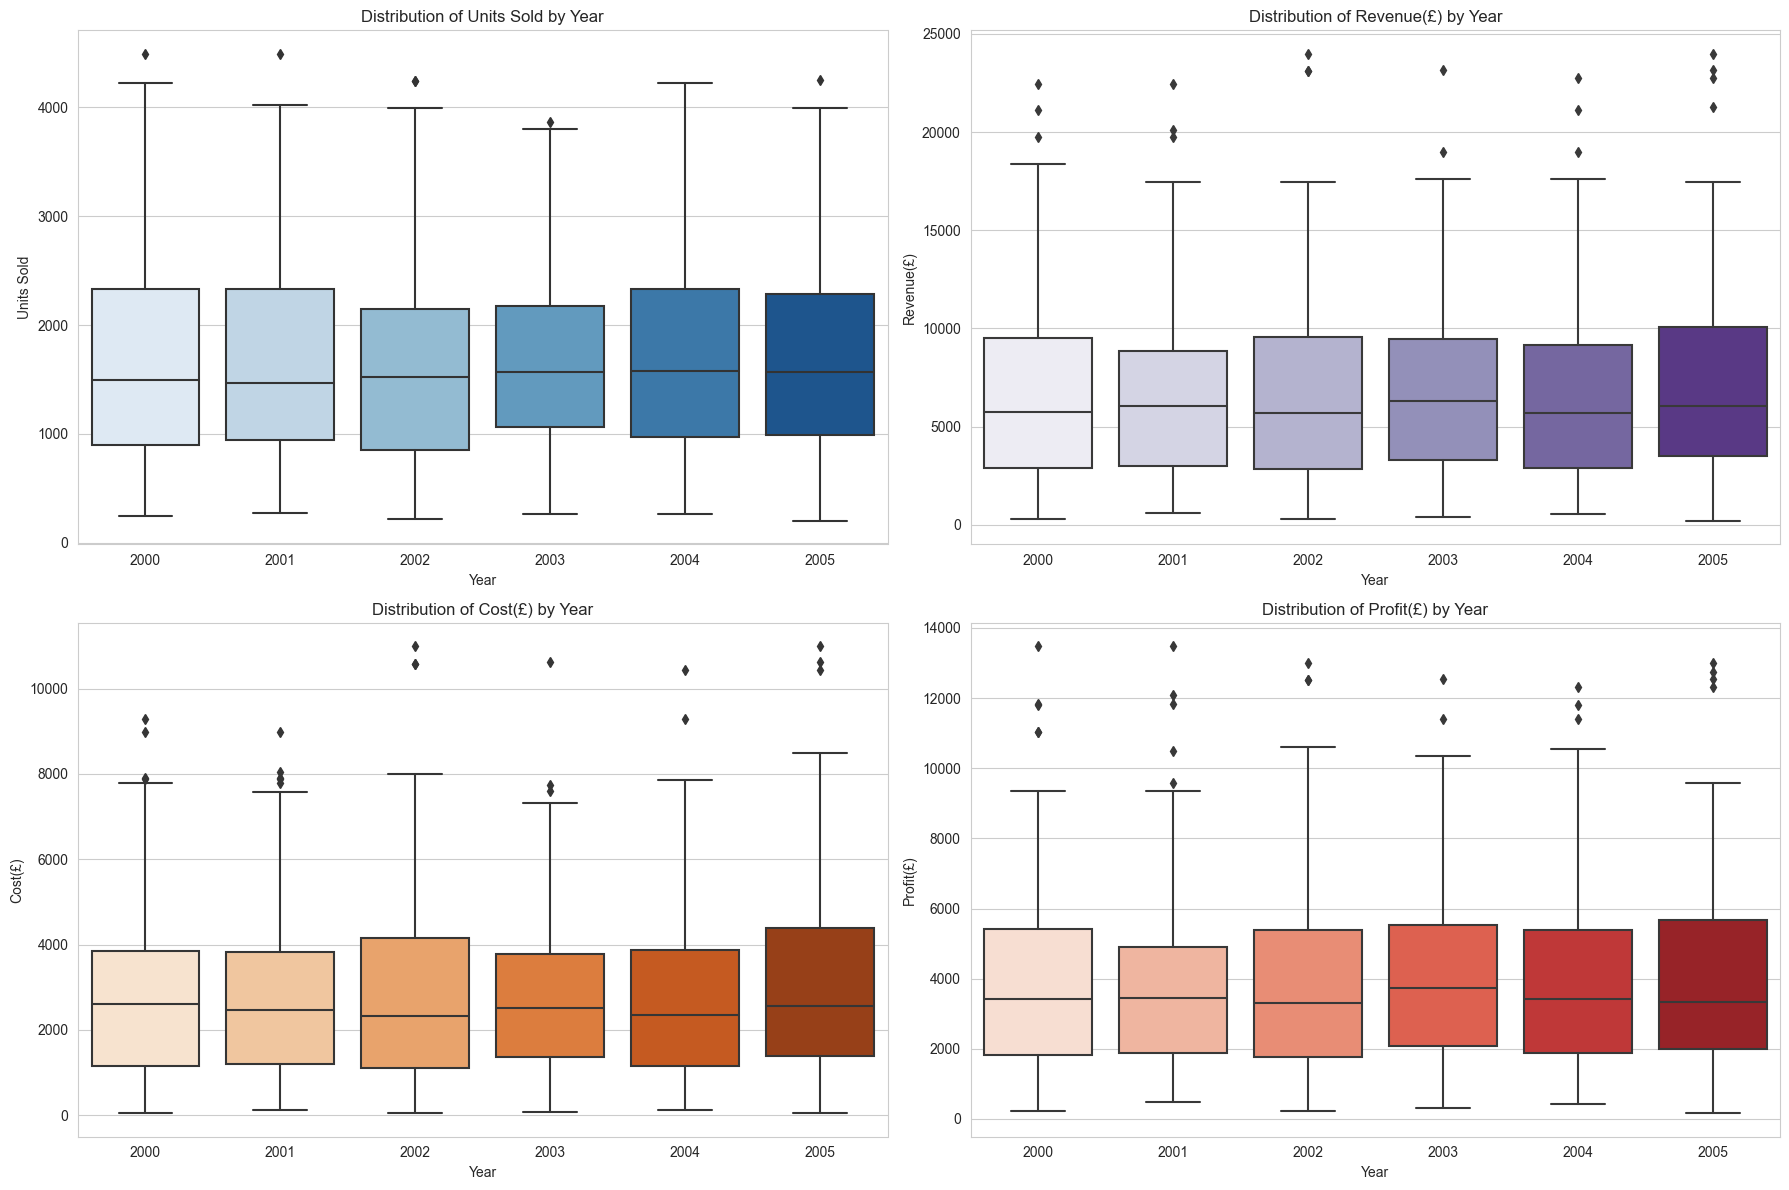

In [8]:
print('Presentation on Standard Deviation by year, instance for identification of Outliers')

# Ensure the 'Date' column is in datetime format and create a 'Year' column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))

# Distribution of Units Sold by Year
plt.subplot(2, 2, 1)
sns.boxplot(x='Year', y='Units Sold', data=df, palette='Blues')
plt.title('Distribution of Units Sold by Year')

# Distribution of Revenue(£) by Year
plt.subplot(2, 2, 2)
sns.boxplot(x='Year', y='Revenue(£)', data=df, palette='Purples')
plt.title('Distribution of Revenue(£) by Year')

# Distribution of Cost(£) by Year
plt.subplot(2, 2, 3)
sns.boxplot(x='Year', y='Cost(£)', data=df, palette='Oranges')
plt.title('Distribution of Cost(£) by Year')

# Distribution of Profit(£) by Year
plt.subplot(2, 2, 4)
sns.boxplot(x='Year', y='Profit(£)', data=df, palette='Reds')
plt.title('Distribution of Profit(£) by Year')

plt.tight_layout()
plt.show()


Presentation on Standard Deviation by year, after removal of Outliers for comparison.
To achieve this, a manual calculaton of Z-score on numberical vairables is used in the plots below.


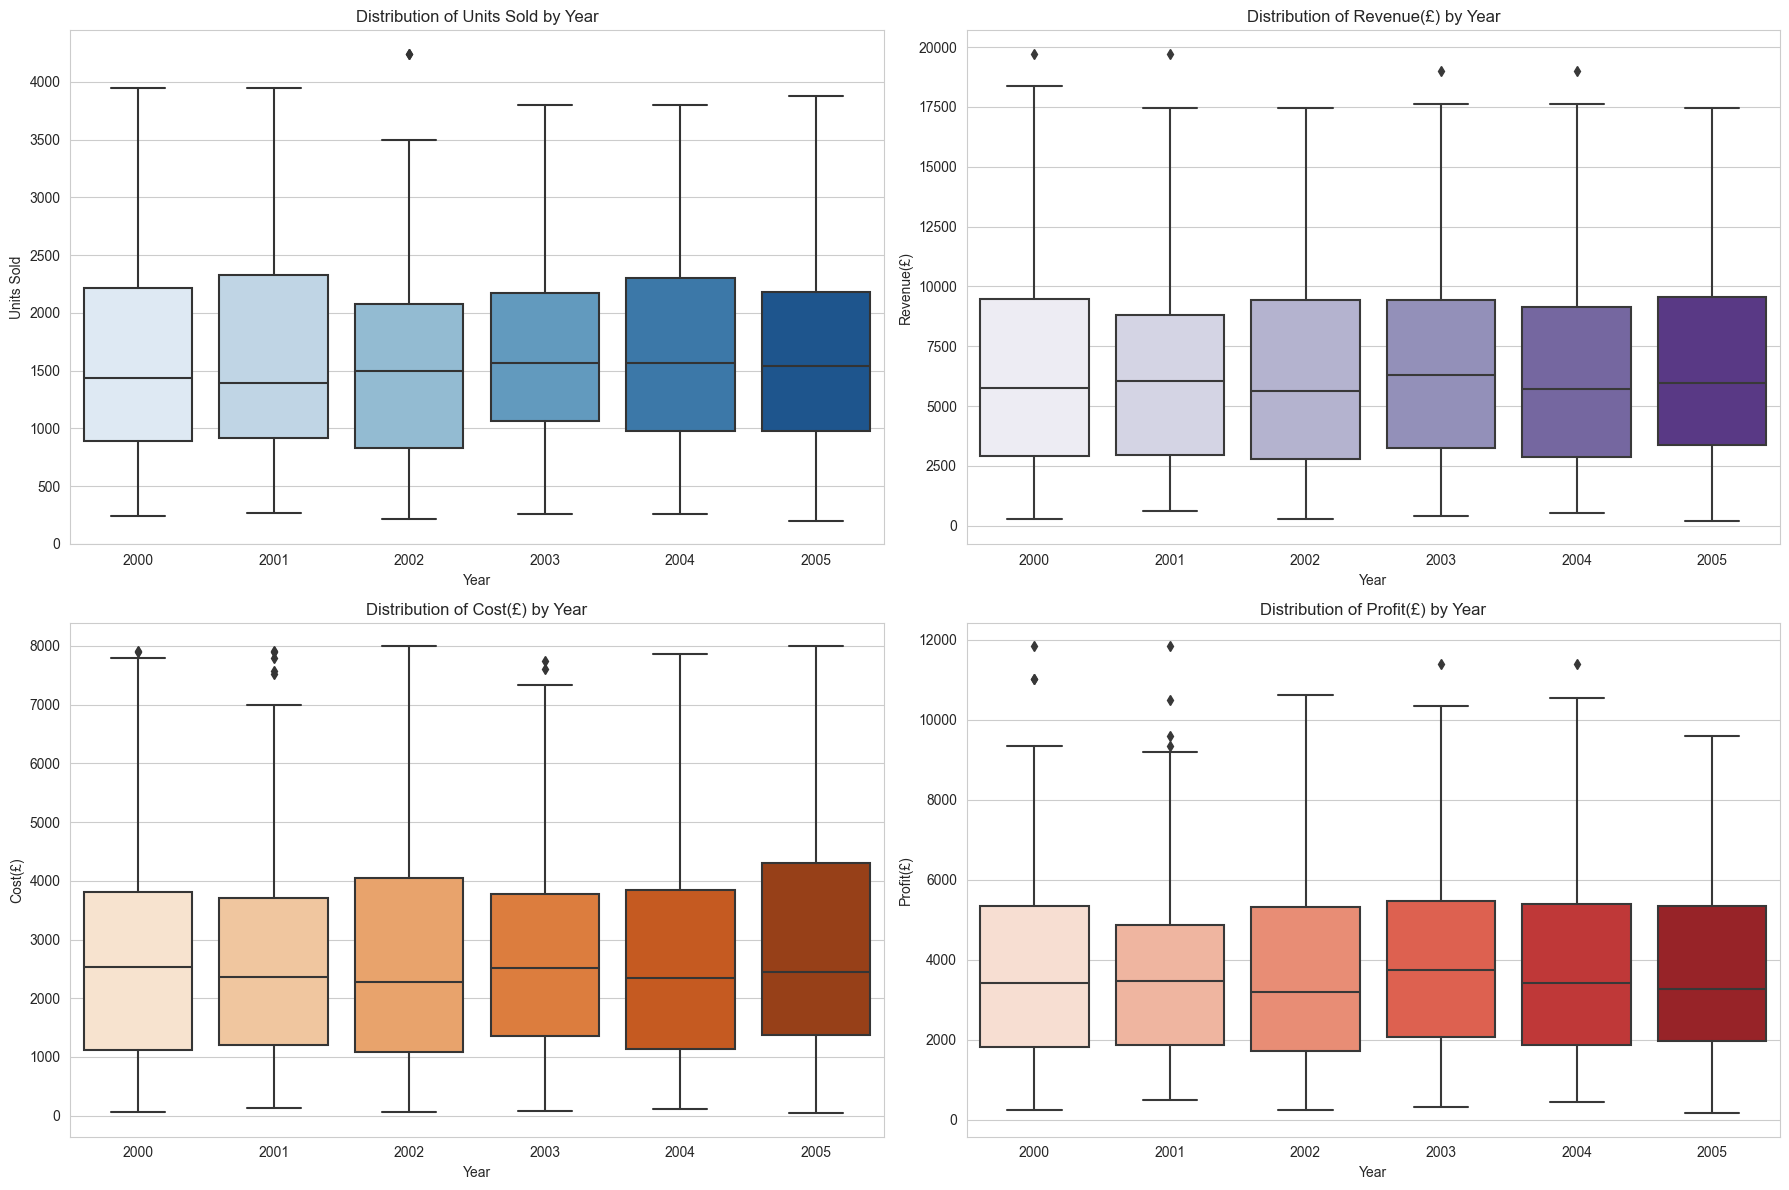

In [9]:
print('Presentation on Standard Deviation by year, after removal of Outliers for comparison.')
print('To achieve this, a manual calculaton of Z-score on numberical vairables is used in the plots below.')

# Declaration of variable containing the numeric variables from spreadsheet
cols = ['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']  

# Calculating the mean and standard deviation for each column separately
mean = df[cols].mean()
std = df[cols].std()

# Defining a condition for rows to keep the variables within 3 standard deviations
conditions = ((df['Units Sold'] - mean['Units Sold']).abs() <= 3 * std['Units Sold']) & \
             ((df['Revenue(£)'] - mean['Revenue(£)']).abs() <= 3 * std['Revenue(£)']) & \
             ((df['Cost(£)'] - mean['Cost(£)']).abs() <= 3 * std['Cost(£)']) & \
             ((df['Profit(£)'] - mean['Profit(£)']).abs() <= 3 * std['Profit(£)'])

# Applying the condition to the dataset to filter out the outliers
df_clean = df[conditions]

sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))

# Distribution of Units Sold by Year without outliers
plt.subplot(2, 2, 1)
sns.boxplot(x='Year', y='Units Sold', data=df_clean, palette='Blues')
plt.title('Distribution of Units Sold by Year')

# Distribution of Revenue(£) by Year without outliers
plt.subplot(2, 2, 2)
sns.boxplot(x='Year', y='Revenue(£)', data=df_clean, palette='Purples')
plt.title('Distribution of Revenue(£) by Year')

# Distribution of Cost(£) by Year without outliers
plt.subplot(2, 2, 3)
sns.boxplot(x='Year', y='Cost(£)', data=df_clean, palette='Oranges')
plt.title('Distribution of Cost(£) by Year')

# Distribution of Profit(£) by Year without outliers
plt.subplot(2, 2, 4)
sns.boxplot(x='Year', y='Profit(£)', data=df_clean, palette='Reds')
plt.title('Distribution of Profit(£) by Year')

plt.tight_layout()
plt.show()


Sales Data across different dimensions, such as time, geography, and distribution channels


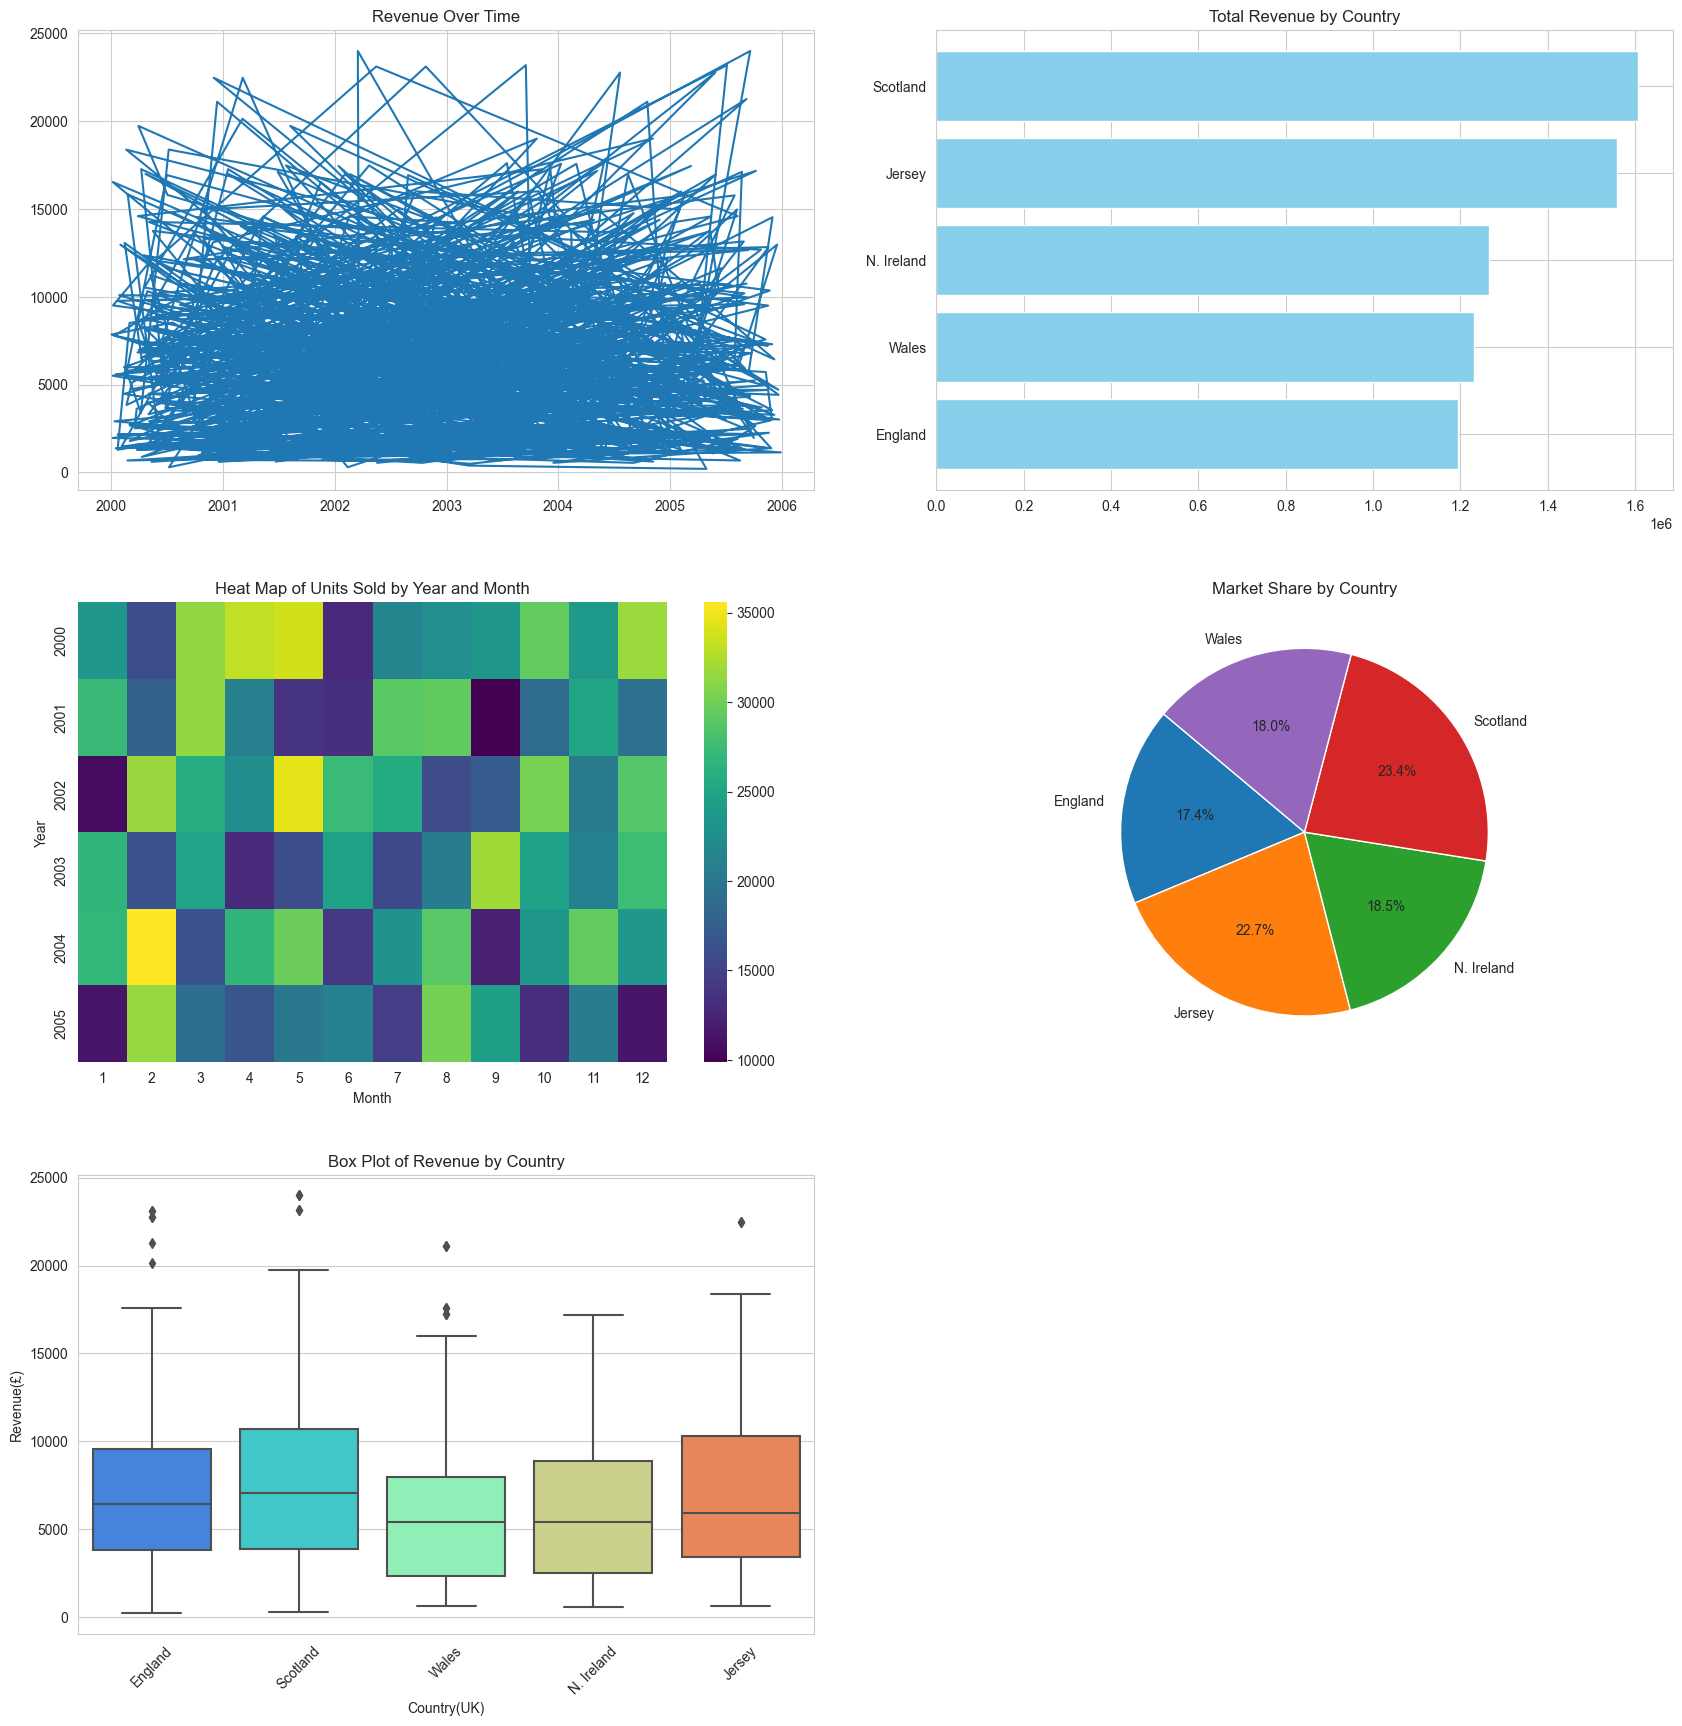

In [10]:
print('Sales Data across different dimensions, such as time, geography, and distribution channels')

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# Adjust layout
plt.tight_layout(pad=6.0)


# Time Series Line Plot for Revenue over Time
axes[0, 0].plot(df['Date'], df['Revenue(£)'])
axes[0, 0].set_title('Revenue Over Time')
axes[0, 0].xaxis.set_major_locator(mdates.YearLocator())
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Bar Chart for Total Revenue by Country
country_revenue = df.groupby('Country(UK)')['Revenue(£)'].sum().sort_values()
axes[0, 1].barh(country_revenue.index, country_revenue.values, color='skyblue')
axes[0, 1].set_title('Total Revenue by Country')

# Heat Map of Sales by Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
pivot_table = df.pivot_table(values='Units Sold', index='Year', columns='Month', aggfunc='sum')
sns.heatmap(pivot_table, cmap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Heat Map of Units Sold by Year and Month')

# Pie Chart of Market Share by Country
market_share = df.groupby('Country(UK)')['Revenue(£)'].sum()
axes[1, 1].pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Market Share by Country')

# Box Plot of Revenue by Country
sns.boxplot(x='Country(UK)', y='Revenue(£)', data=df, ax=axes[2, 0], palette='rainbow')
axes[2, 0].set_title('Box Plot of Revenue by Country')
axes[2, 0].tick_params(axis='x', rotation=45)

fig.delaxes(axes[2][1])
plt.show()


Heatmap presenting the strength of the linear relationship between pairs of numerical variables: Units Sold, Revenue, Cost, and Profit.


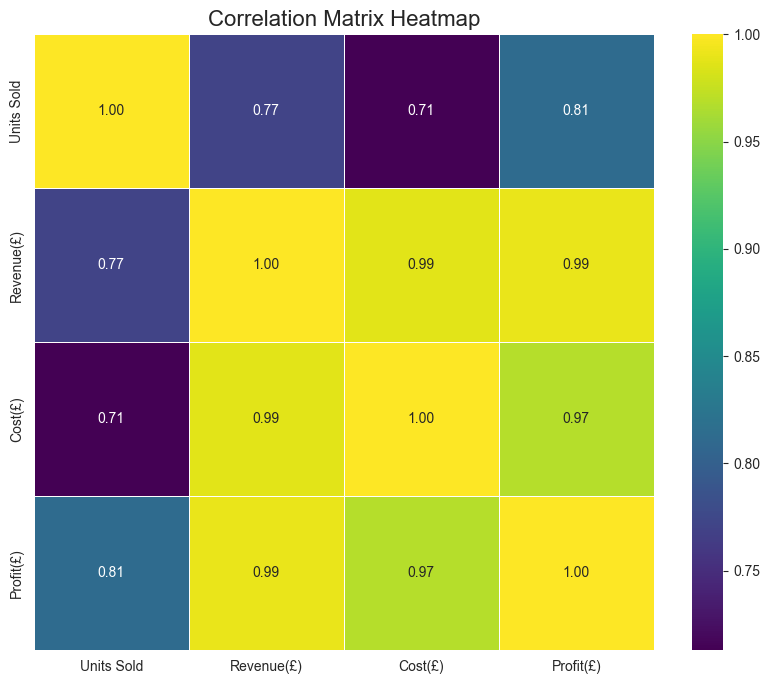

In [11]:
print('Heatmap presenting the strength of the linear relationship between pairs of numerical variables: Units Sold, Revenue, Cost, and Profit.')

# List of numeric variables after data has been cleaned, separate manipulation
numeric_vars = ['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']  

# Calculation of correlation matrix for the numeric variables
corr_matrix = df_clean[numeric_vars].corr()

# Set up the matplotlib figure (you can adjust the size if needed)
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

# Add a title with matplotlib
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()

Presentation of Profit(£), segregated by Country(UK) and Confectionary only


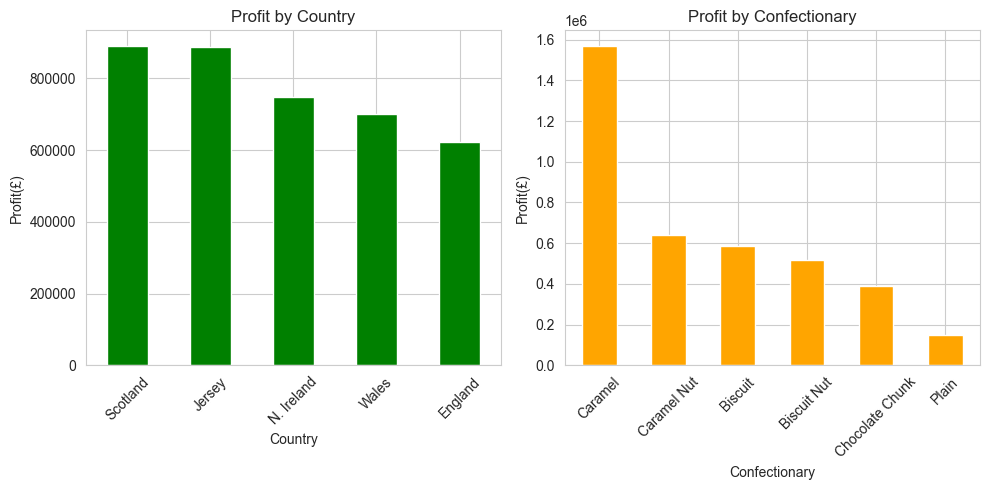


 The Profit(£) segregated by Country(UK) is: 
 
 Country(UK)
Scotland      889081.0
Jersey        886721.0
N. Ireland    746995.0
Wales         699428.0
England       621131.0
Name: Profit(£), dtype: float64


 The Profit(£) segregated by Confectionary is: 
 
 Confectionary
Caramel            1566966.0
Caramel Nut         637839.0
Biscuit             583636.0
Biscuit Nut         515298.0
Chocolate Chunk     391584.0
Plain               148034.0
Name: Profit(£), dtype: float64


In [12]:
print('Presentation of Profit(£), segregated by Country(UK) and Confectionary only')

# Declaration of variable pcountry, which pulls country from the df frame and groups it by profit
pcountry = df_clean.groupby('Country(UK)')['Profit(£)'].sum().sort_values(ascending=False)

# Declaration of variable pconfectionary, which pulls type of sweet from the df and groups it by profit
pconfectionary = df_clean.groupby('Confectionary')['Profit(£)'].sum().sort_values(ascending=False)

# Create a figure and a grid of 1x2 subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot 'Profit by Country' on the first subplot
pcountry.plot(kind='bar', color='green', ax=axs[0]) 
axs[0].set_title('Profit by Country')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Profit(£)')
axs[0].tick_params(axis='x', rotation=45)



# Plot 'Profit by Confectionary' on the second subplot
pconfectionary.plot(kind='bar', color='orange', ax=axs[1]) 
axs[1].set_title('Profit by Confectionary')
axs[1].set_xlabel('Confectionary')
axs[1].set_ylabel('Profit(£)')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()

# Display the plots
plt.show()

print('\n','The Profit(£) segregated by Country(UK) is:','\n','\n',pcountry.round())
print()
print('\n','The Profit(£) segregated by Confectionary is:','\n','\n',pconfectionary.round())

In the plots below are presented observations on Profit by Confectionary and Country (UK) Over Years


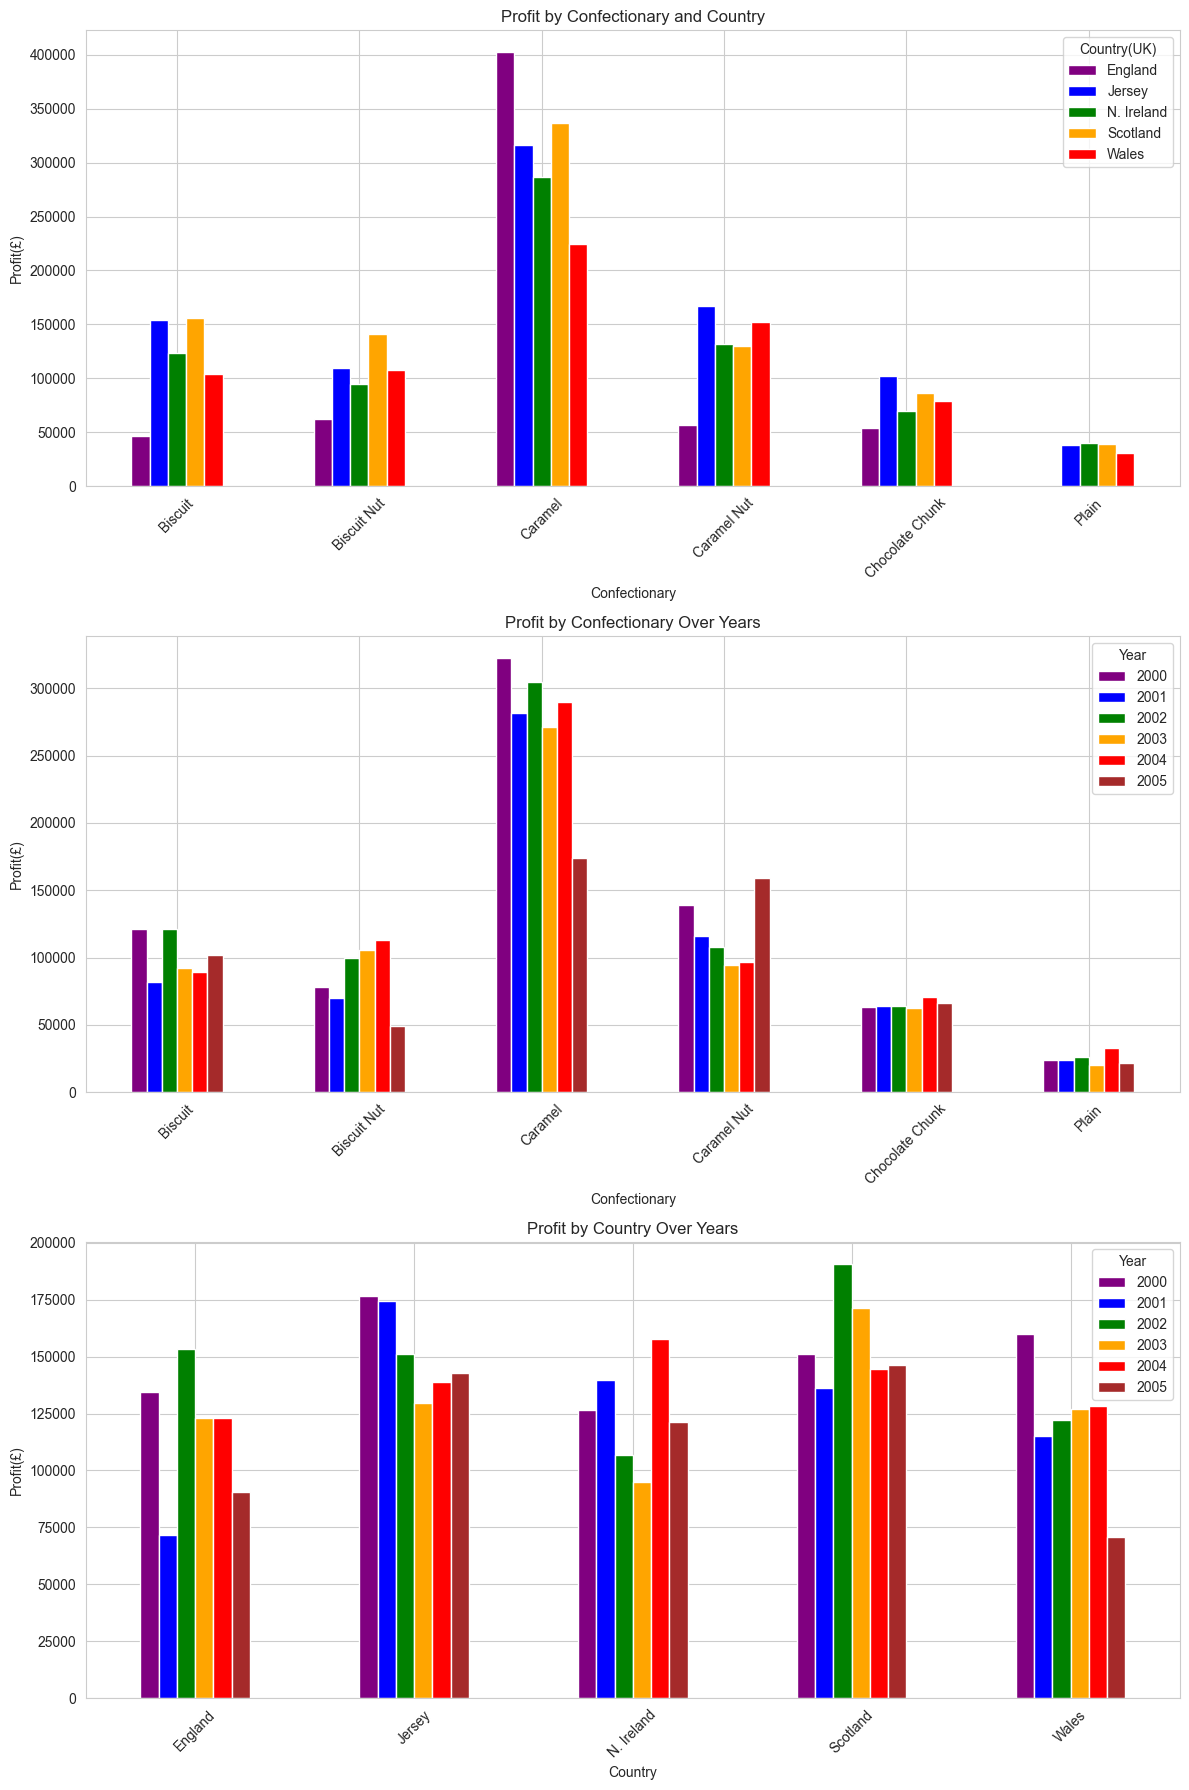

In [13]:
print('In the plots below are presented observations on Profit by Confectionary and Country (UK) Over Years')

# Convert 'Date' column in datetime format and declaration of a 'Year' column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Grouping data as required for each plot
confectionary_country = df_clean.groupby(['Confectionary', 'Country(UK)'])['Profit(£)'].sum().unstack()
confectionary_year =df.groupby(['Confectionary', 'Year'])['Profit(£)'].sum().unstack()
country_year = df.groupby(['Country(UK)', 'Year'])['Profit(£)'].sum().unstack()

# Setting up the figure for subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Custom colors for the plots
colors = ['purple', 'blue', 'green', 'orange', 'red', 'brown']

# Plot 1: Confectionary by Country
confectionary_country.plot(kind='bar', stacked=False, color=colors, ax=axs[0])
axs[0].set_title('Profit by Confectionary and Country')
axs[0].set_xlabel('Confectionary')
axs[0].set_ylabel('Profit(£)')
axs[0].tick_params(axis='x', rotation=45)

# Plot 2: Confectionary by Year
confectionary_year.plot(kind='bar', stacked=False, color=colors, ax=axs[1])
axs[1].set_title('Profit by Confectionary Over Years')
axs[1].set_xlabel('Confectionary')
axs[1].set_ylabel('Profit(£)')
axs[1].tick_params(axis='x', rotation=45)

# Plot 3: Country by Year
country_year.plot(kind='bar', stacked=False, color=colors, ax=axs[2])
axs[2].set_title('Profit by Country Over Years')
axs[2].set_xlabel('Country')
axs[2].set_ylabel('Profit(£)')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [14]:
print('Presentation of normalized data.')
print('The data is normalized at this stage so that the graphs so far can reflect the numbers on sales report.')
# Normalization of numerical columns with use of Min-Max scaling
numerical_columns = ['Units Sold', 'Revenue(£)', 'Profit(£)', 'Cost(£)']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler to your data and transforming the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print('This process can significantly improve the performance of many machine learning algorithms, especially those sensitive to the scale of the data, such as DBSCAN.\n')
# Checking the first few rows to see the normalized data
print(df.head())

Presentation of normalized data.
The data is normalized at this stage so that the graphs so far can reflect the numbers on sales report.
This process can significantly improve the performance of many machine learning algorithms, especially those sensitive to the scale of the data, such as DBSCAN.

        Date Country(UK) Confectionary  Units Sold  Revenue(£)   Cost(£)   
0 2002-11-11     England       Biscuit    0.213836    0.226585  0.220877  \
1 2002-07-05     England       Biscuit    0.118332    0.140407  0.138537   
2 2001-10-31     England       Biscuit    0.249010    0.258324  0.251203   
3 2004-09-13     England       Biscuit    0.333333    0.334412  0.323903   
4 2004-03-10     England       Biscuit    0.475192    0.462418  0.446209   

   Profit(£)  Year  Month  
0   0.223020  2002     11  
1   0.136827  2002      7  
2   0.254764  2001     10  
3   0.330866  2004      9  
4   0.458893  2004      3  


Presentation of NearestNeighbors model to find the k-distance


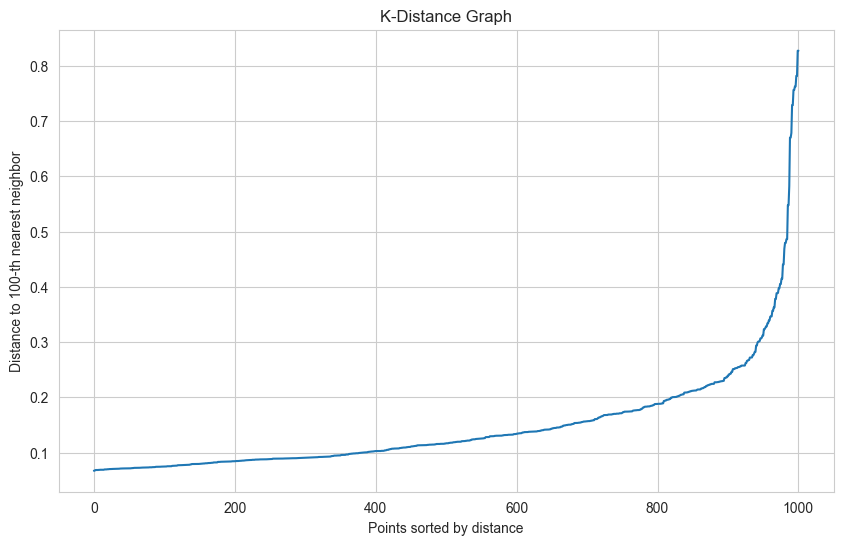

In [15]:
print('Presentation of NearestNeighbors model to find the k-distance')

# Firstly, let's ensure the values in the numerical columns are indeed of numerical type
df['Revenue(£)'] = pd.to_numeric(df['Revenue(£)'])
df['Units Sold'] = pd.to_numeric(df['Units Sold'])
df['Cost(£)'] = pd.to_numeric(df['Cost(£)'])
df['Profit(£)'] = pd.to_numeric(df['Profit(£)'])


# Preparing the data for DBSCAN 
clustering_data = df[['Units Sold', 'Revenue(£)', 'Profit(£)', 'Cost(£)']]
k = int(len(clustering_data) * 0.1)


# Initializing the NearestNeighbors model to find the k-distance
nbrs = NearestNeighbors(n_neighbors=k).fit(clustering_data)

# Finding the distance to the k-th nearest neighbor for each point
distances, indices = nbrs.kneighbors(clustering_data)

# Sorting the distances
sorted_distances = np.sort(distances[:, k-1], axis=0)

# Plotting the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.show()

In [16]:
print('Presentation of Density Based Clustering (DBSCAN Algorithm)')
print('Looking at the `elbow` of the graph (in hundreds), the eps sits between 0.1 and 0.2 as where the curve bends.')
print('Calculations for DBSCAN were completed using eps as 0.13. 0.2 and 0.15 provides best balance between noise and separate clusters.\n')

# Applying DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=8).fit(clustering_data)

# Applying DBSCAN
# dbscan = DBSCAN(eps=0.13, min_samples=5).fit(clustering_data)

# Applying DBSCAN
# dbscan = DBSCAN(eps=0.2, min_samples=5).fit(clustering_data)

# Adding the cluster labels to the data
df['Cluster'] = dbscan.labels_

# Checking the distribution of clusters formed again
cluster_distribution = df['Cluster'].value_counts().sort_index()

print(cluster_distribution)
print('\nBased on the performed DBSCAN, the following can be confirmed: there are 3 clusters.')
print('Cluster -1: 10 points - considered as noise or outliers by DBSCAN.')
print('Cluster 0: 983 points is the largest cluster.')
print('Additional separated cluster with size  from 1 to 8 points.')

Presentation of Density Based Clustering (DBSCAN Algorithm)
Looking at the `elbow` of the graph (in hundreds), the eps sits between 0.1 and 0.2 as where the curve bends.
Calculations for DBSCAN were completed using eps as 0.13. 0.2 and 0.15 provides best balance between noise and separate clusters.

Cluster
-1     10
 0    983
 1      8
Name: count, dtype: int64

Based on the performed DBSCAN, the following can be confirmed: there are 3 clusters.
Cluster -1: 10 points - considered as noise or outliers by DBSCAN.
Cluster 0: 983 points is the largest cluster.
Additional separated cluster with size  from 1 to 8 points.


Presentation of Density Based Clustering vizualised using Scatter plots



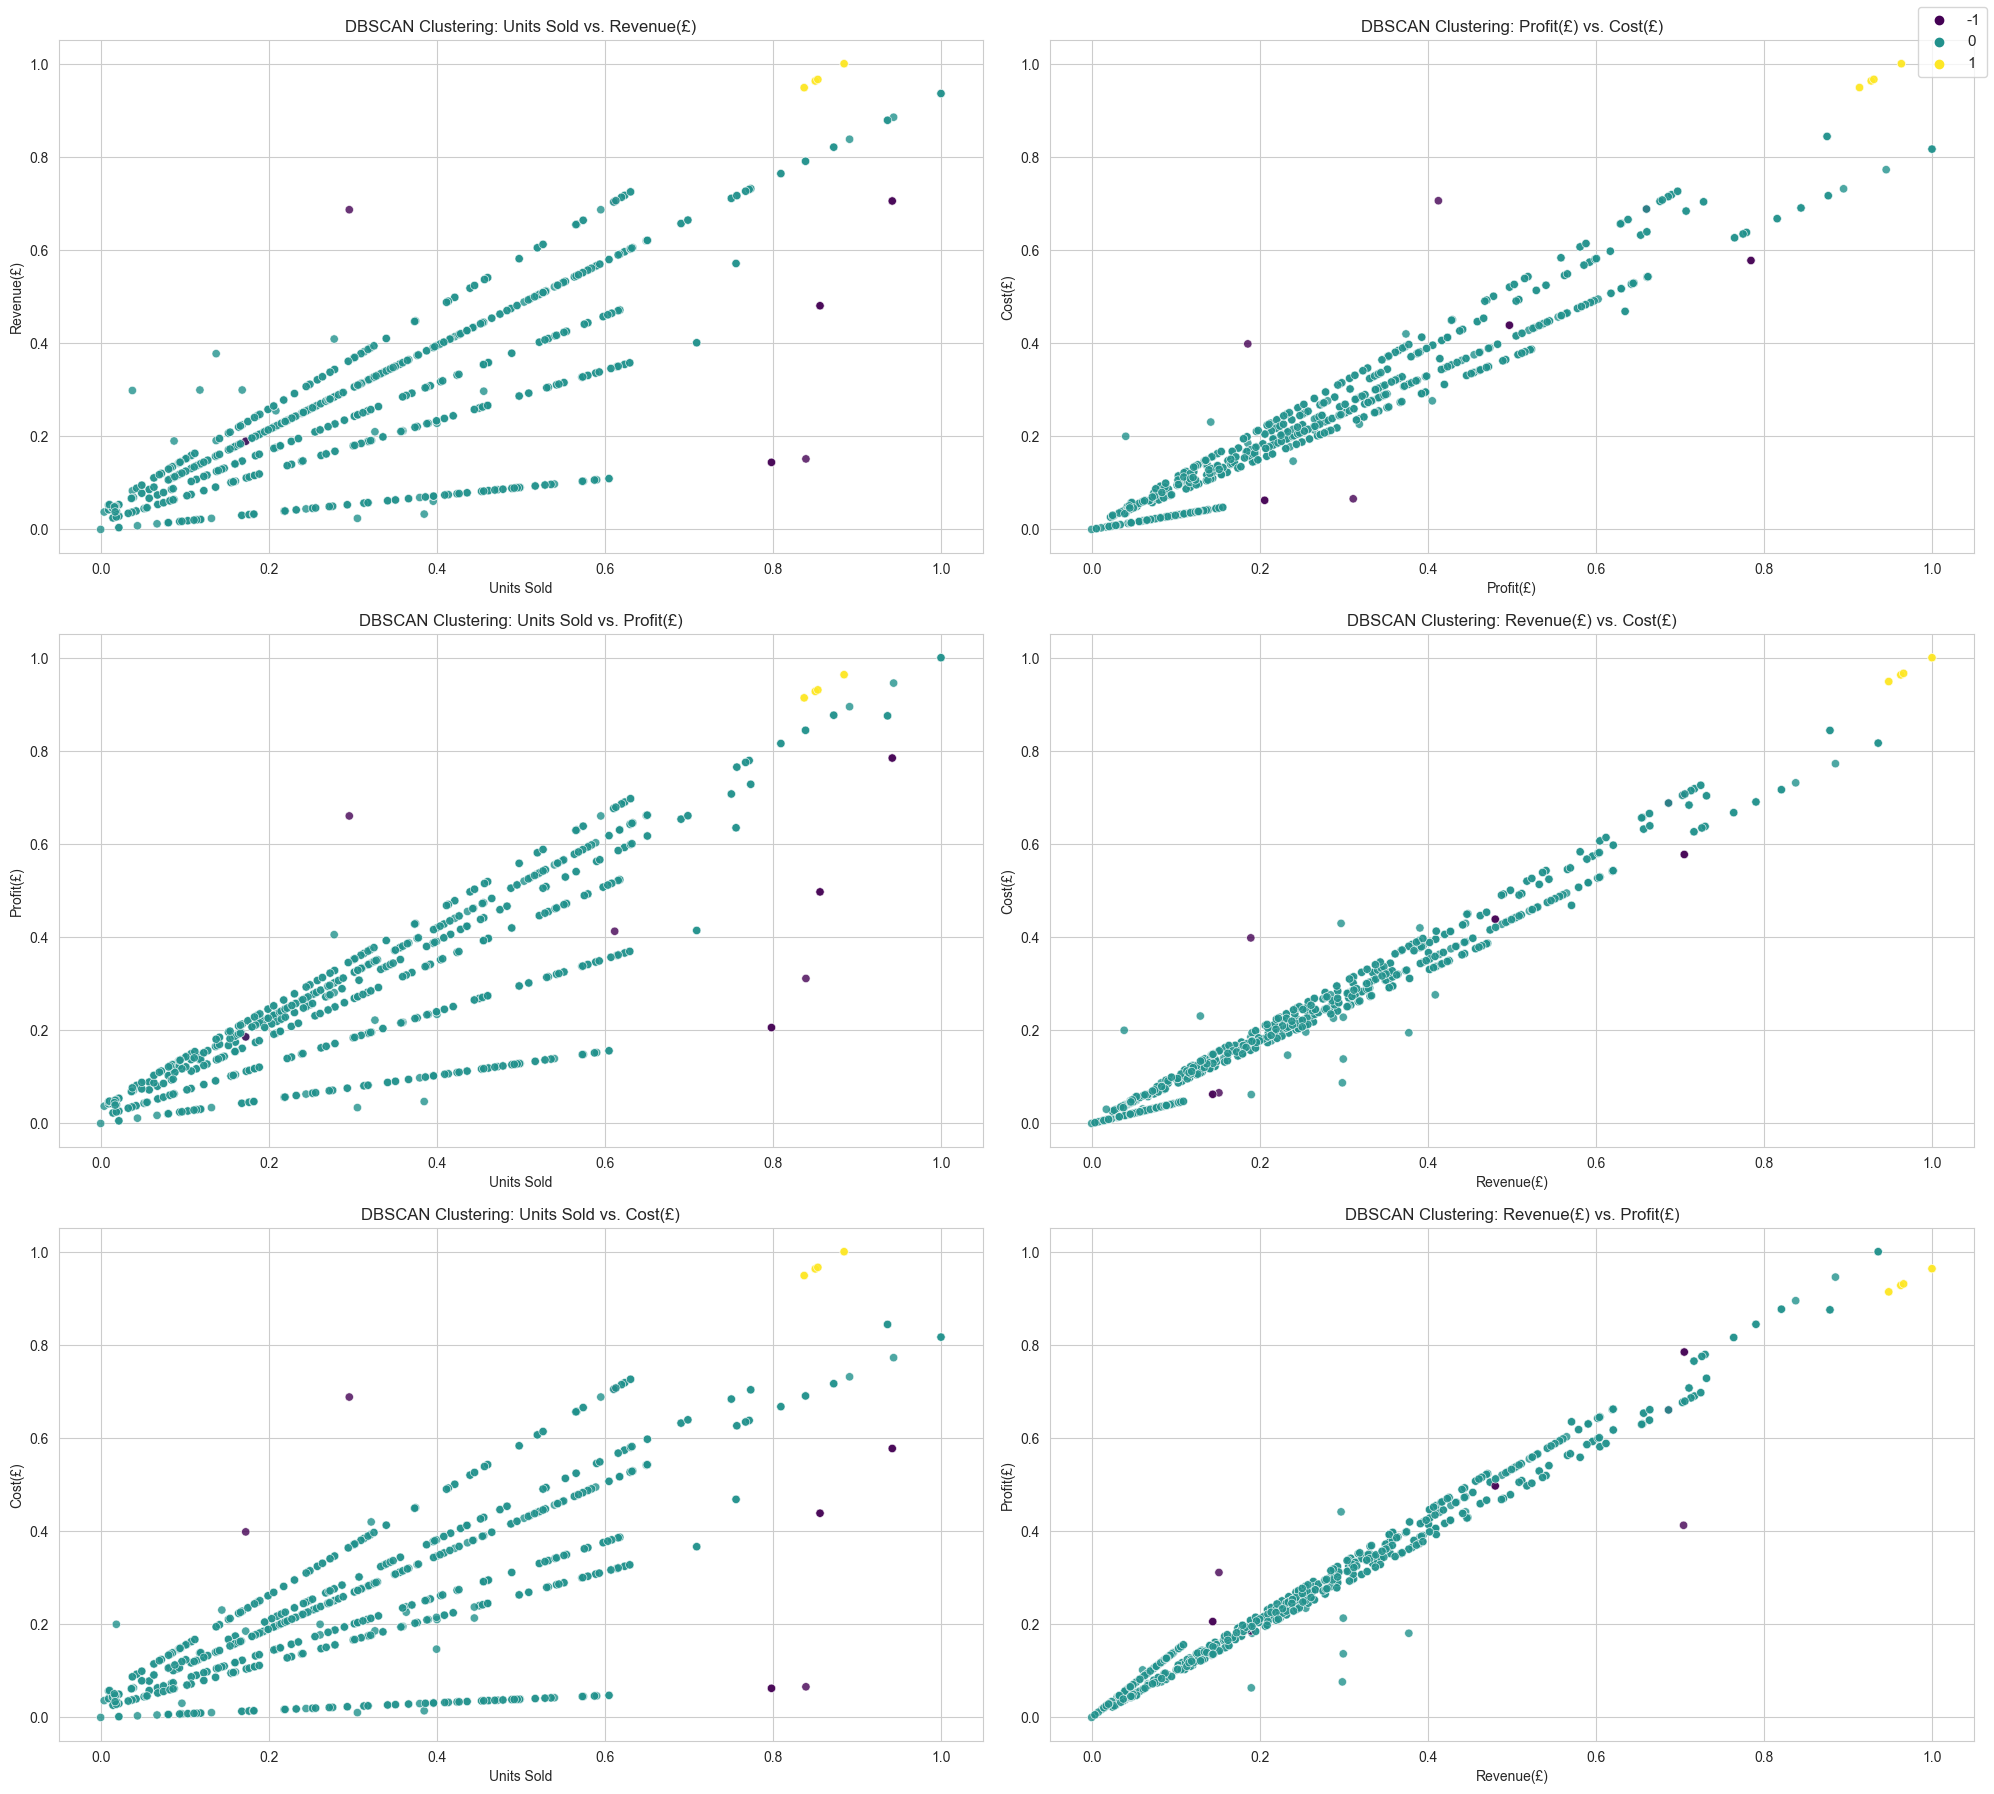

In [17]:
print('Presentation of Density Based Clustering vizualised using Scatter plots\n')
# Setting up the figure and axes for a 3x2 grid of plots
fig, axs = plt.subplots(3, 2, figsize=(20, 18))  # Adjusted to 3 rows, 2 columns
sns.set(style="whitegrid")

# Scatter plot for 'Units Sold' vs. 'Revenue(£)'
sns.scatterplot(ax=axs[0, 0], x='Units Sold', y='Revenue(£)', hue='Cluster', palette='viridis', data=df, legend="full", alpha=0.8)
axs[0, 0].set_title('DBSCAN Clustering: Units Sold vs. Revenue(£)')

# Scatter plot for 'Profit(£)' vs. 'Cost(£)'
sns.scatterplot(ax=axs[0, 1], x='Profit(£)', y='Cost(£)', hue='Cluster', palette='viridis', data=df, legend="full", alpha=0.8)
axs[0, 1].set_title('DBSCAN Clustering: Profit(£) vs. Cost(£)')

# Scatter plot for 'Units Sold' vs. 'Profit(£)'
sns.scatterplot(ax=axs[1, 0], x='Units Sold', y='Profit(£)', hue='Cluster', palette='viridis', data=df, legend="full", alpha=0.8)
axs[1, 0].set_title('DBSCAN Clustering: Units Sold vs. Profit(£)')

# 'Revenue(£)' vs. 'Cost(£)'
sns.scatterplot(ax=axs[1, 1], x='Revenue(£)', y='Cost(£)', hue='Cluster', palette='viridis', data=df, legend="full", alpha=0.8)
axs[1, 1].set_title('DBSCAN Clustering: Revenue(£) vs. Cost(£)')

# 'Units Sold' vs. 'Cost(£)'
sns.scatterplot(ax=axs[2, 0], x='Units Sold', y='Cost(£)', hue='Cluster', palette='viridis', data=df, legend="full", alpha=0.8)
axs[2, 0].set_title('DBSCAN Clustering: Units Sold vs. Cost(£)')

# 'Revenue(£)' vs. 'Profit(£)'
sns.scatterplot(ax=axs[2, 1], x='Revenue(£)', y='Profit(£)', hue='Cluster', palette='viridis', data=df, legend="full", alpha=0.8)
axs[2, 1].set_title('DBSCAN Clustering: Revenue(£) vs. Profit(£)')


handles, labels = axs[2, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

for ax in axs.flat:
    ax.get_legend().remove()

plt.tight_layout()
plt.show()


In [18]:
print('Calculations for profitability over time.\n')
# Let's calculate the profit margin index (%)
df['index'] = ((df['Profit(£)'] / df['Revenue(£)']) * 100)
print('Missing values in profit margin:',df['index'].isna().sum())
df['index'] = df['index'].fillna(df['index'].mean())
print('Missing values in profit margin:',df['index'].isna().sum())
# Profit analisys and forecasting modeling techniques
print()
print(df.head())

Calculations for profitability over time.

Missing values in profit margin: 1
Missing values in profit margin: 0

        Date Country(UK) Confectionary  Units Sold  Revenue(£)   Cost(£)   
0 2002-11-11     England       Biscuit    0.213836    0.226585  0.220877  \
1 2002-07-05     England       Biscuit    0.118332    0.140407  0.138537   
2 2001-10-31     England       Biscuit    0.249010    0.258324  0.251203   
3 2004-09-13     England       Biscuit    0.333333    0.334412  0.323903   
4 2004-03-10     England       Biscuit    0.475192    0.462418  0.446209   

   Profit(£)  Year  Month  Cluster      index  
0   0.223020  2002     11        0  98.426600  
1   0.136827  2002      7        0  97.450383  
2   0.254764  2001     10        0  98.622017  
3   0.330866  2004      9        0  98.939445  
4   0.458893  2004      3        0  99.237764  


Profit margin by Confectionary and Country and Years


<Figure size 1500x600 with 0 Axes>

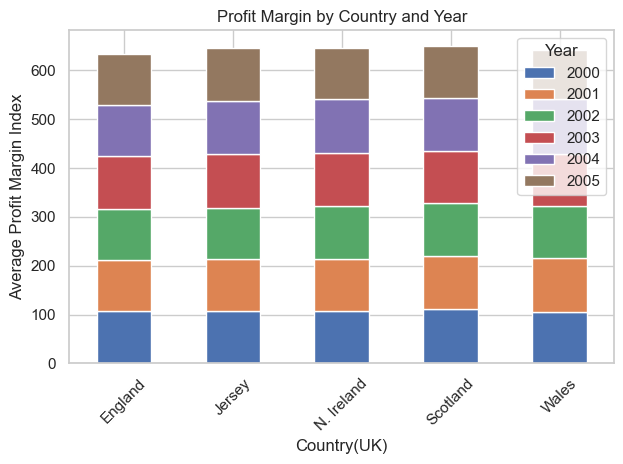

<Figure size 1500x600 with 0 Axes>

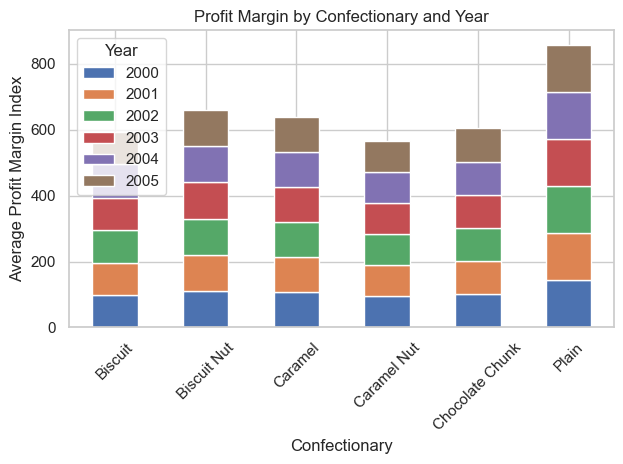

In [19]:
print('Profit margin by Confectionary and Country and Years')
# Profit margin by Confectionary and Country 
# The two vizualisations serve as comparison to variables pcountry/pconfectionary 
# And their two displayed plots Profit by Confectionary and Profit by Country 

# Group by 'Country(UK)' and 'Year', then 'Confectionary' and 'Year', and calculate the mean 'index'
pcountry_index = df.groupby(['Country(UK)', 'Year'])['index'].mean()
pconfectionary_index = df.groupby(['Confectionary', 'Year'])['index'].mean()

# Profit by Country
plt.figure(figsize=(15, 6))
pcountry_index.unstack().plot(kind='bar', stacked=True)
plt.title('Profit Margin by Country and Year')
plt.xlabel('Country(UK)')
plt.ylabel('Average Profit Margin Index')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

# Profit by Confectionary
plt.figure(figsize=(15, 6))
pconfectionary_index.unstack().plot(kind='bar', stacked=True)
plt.title('Profit Margin by Confectionary and Year')
plt.xlabel('Confectionary')
plt.ylabel('Average Profit Margin Index')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


Presentation of Z-score for profit margin

        Date Country(UK) Confectionary  Units Sold  Revenue(£)   Cost(£)   
0 2002-11-11     England       Biscuit    0.213836    0.226585  0.220877  \
1 2002-07-05     England       Biscuit    0.118332    0.140407  0.138537   
2 2001-10-31     England       Biscuit    0.249010    0.258324  0.251203   
3 2004-09-13     England       Biscuit    0.333333    0.334412  0.323903   
4 2004-03-10     England       Biscuit    0.475192    0.462418  0.446209   

   Profit(£)  Year  Month  Cluster      index   z-score  
0   0.223020  2002     11        0  98.426600 -0.579392  
1   0.136827  2002      7        0  97.450383 -0.642624  
2   0.254764  2001     10        0  98.622017 -0.566735  
3   0.330866  2004      9        0  98.939445 -0.546174  
4   0.458893  2004      3        0  99.237764 -0.526852  

Average Z-score is: 5.554442464857926e-16%
Average Z-score is: 0.00%

Plots of Z-score for profit margin for units sold and confectionary


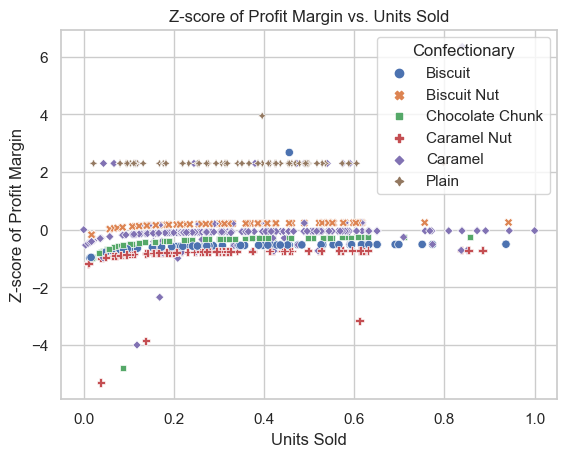

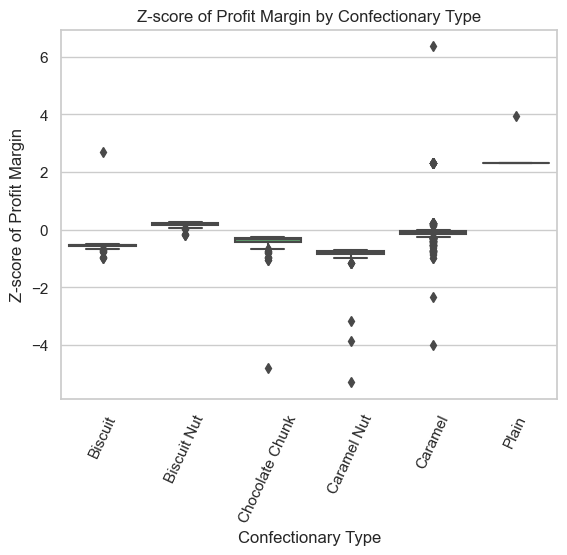

In [20]:
print('Presentation of Z-score for profit margin\n')
# Calculation of Z-score on Profit Margin Index, this time using the automated stats library 
# Comparison on Z-score with Confectionary and Units Sold

df['z-score'] = stats.zscore(df['index'])
print(df.head())
print()

avg_zscore = df['z-score'].mean()
print(f"Average Z-score is: {avg_zscore}%")
print(f"Average Z-score is: {avg_zscore:.2f}%\n")
print('Plots of Z-score for profit margin for units sold and confectionary')

sns.scatterplot(data=df, x='Units Sold', y='z-score', hue='Confectionary', style='Confectionary')
plt.title('Z-score of Profit Margin vs. Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Z-score of Profit Margin')
plt.show()

sns.boxplot(data=df, x='Confectionary', y='z-score')
plt.title('Z-score of Profit Margin by Confectionary Type')
plt.xlabel('Confectionary Type')
plt.ylabel('Z-score of Profit Margin')
plt.xticks(rotation=65)  
plt.show()

Implementation and presentation of Linear Regression forecasting model

The evaluation metrics are as follows:
Mean Squared Error: 0.00046592349306414776
R-squared: 0.987333705111349
The model shows extreme accuracy to 0, which means that should sales continue in this patterns, the business will succeed on market.


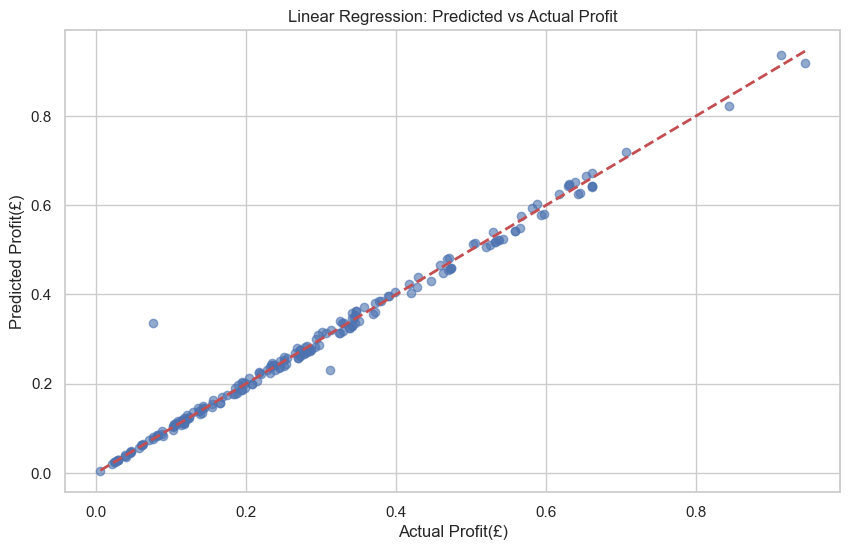

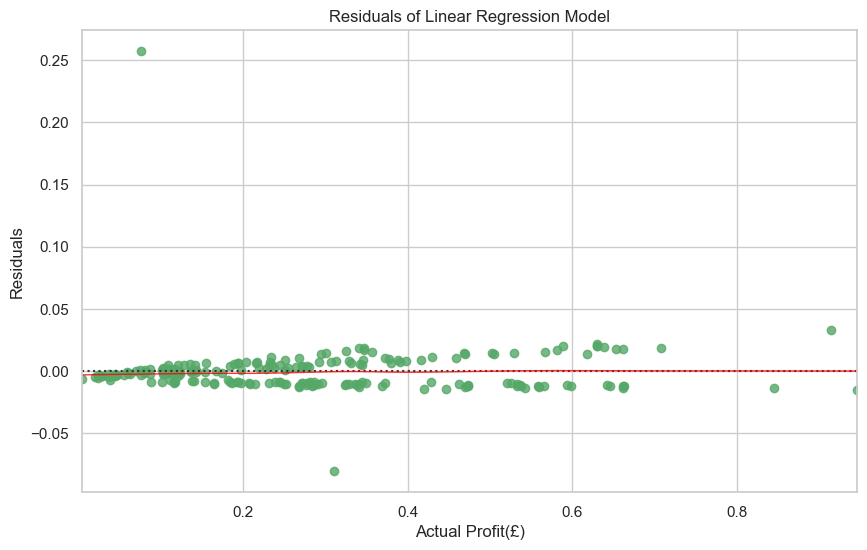

In [21]:
print('Implementation and presentation of Linear Regression forecasting model')


df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month 

# Define the independent (features) and dependent (target) variables
X = df[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Year', 'Month']]  
y = df['Profit(£)'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = linear_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nThe evaluation metrics are as follows:')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('The model shows extreme accuracy to 0, which means that should sales continue in this patterns, the business will succeed on market.')

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for reference
plt.title('Linear Regression: Predicted vs Actual Profit')
plt.xlabel('Actual Profit(£)')
plt.ylabel('Predicted Profit(£)')
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color="g", line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Residuals of Linear Regression Model')
plt.xlabel('Actual Profit(£)')
plt.ylabel('Residuals')
plt.show()



Presentation of forecast for incoming financial reconciliation period, using ARIMA model.


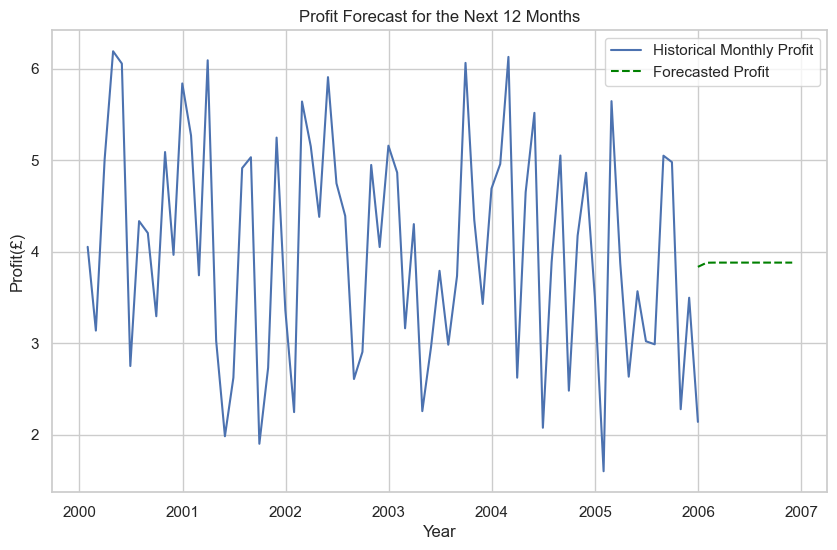

In [22]:
print('Presentation of forecast for incoming financial reconciliation period, using ARIMA model.')

# Preparing the columnd date again for manipulation
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resampling of the data by month-end frequency M and sum the values to get monthly data
monthly_data = df.resample('M').sum()  

# Declaration of  the ARIMA model and fit it to the monthly data
model = ARIMA(monthly_data['Profit(£)'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months of profit
forecast = model_fit.forecast(steps=12)

# Declaration of a date range for the forecasted data starting the month after the last month in the historical data
forecast_dates = pd.date_range(start=monthly_data.index[-1], periods=12, freq='M')

# Plot the historical and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Profit(£)'], label='Historical Monthly Profit')
plt.plot(forecast_dates, forecast, label='Forecasted Profit', color='green', linestyle='--')
plt.title('Profit Forecast for the Next 12 Months')
plt.xlabel('Year')
plt.ylabel('Profit(£)')
plt.legend()
plt.show()


In [23]:
print('Presentation of implementation of Apriori Model to identify frequent itemsets and their association rules.\n')

# Application of Apriori Algorithm 
# For robust observations, the algorithm has been applied accross the available text fields in dataset 
# Therefore each entry of the data set will be treated as single transaction 
# To achieve this, parts of dataset will be transofmed into tuples that are validated by algorithm

df.reset_index(inplace=True)
transaction_tuples = list(zip(df['Country(UK)'], df['Confectionary'], df['Date'], df['Units Sold']))

# Definition for minimum support and confidence values 

tuple_support = 0.01
tuple_confidence = 0.1

# Run the algorithm on the tuples 

itemsets,rules = apriori(transaction_tuples, min_support = tuple_support, min_confidence = tuple_confidence)

# Print out the results
print('Frequent Itemsets:','\n','\n', itemsets)
print('\n','Association Rules:','\n')
for rule in rules:
    print(rule)

Presentation of implementation of Apriori Model to identify frequent itemsets and their association rules.

Frequent Itemsets: 
 
 {1: {('England',): 161, ('Biscuit',): 124, ('Biscuit Nut',): 125, ('Chocolate Chunk',): 146, ('Caramel Nut',): 149, ('Scotland',): 210, ('Caramel',): 345, ('Plain',): 112, ('Wales',): 210, ('N. Ireland',): 210, ('Jersey',): 210}, 2: {('Biscuit', 'Jersey'): 30, ('Biscuit', 'N. Ireland'): 30, ('Biscuit', 'Scotland'): 28, ('Biscuit', 'Wales'): 26, ('Biscuit Nut', 'England'): 15, ('Biscuit Nut', 'Jersey'): 26, ('Biscuit Nut', 'N. Ireland'): 26, ('Biscuit Nut', 'Scotland'): 28, ('Biscuit Nut', 'Wales'): 30, ('Caramel', 'England'): 105, ('Caramel', 'Jersey'): 60, ('Caramel', 'N. Ireland'): 60, ('Caramel', 'Scotland'): 60, ('Caramel', 'Wales'): 60, ('Caramel Nut', 'England'): 15, ('Caramel Nut', 'Jersey'): 34, ('Caramel Nut', 'N. Ireland'): 34, ('Caramel Nut', 'Scotland'): 32, ('Caramel Nut', 'Wales'): 34, ('Chocolate Chunk', 'England'): 16, ('Chocolate Chunk', 'J